In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
import math

In [2]:
atac_frags_replicate_4=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/5.replicate_4/counts_region/atac_fragments_clean.tsv",sep="\t",low_memory=False,header=None)
atac_frags_replicate_4['barcodes']=atac_frags_replicate_4[3].str[:-2]

In [3]:
atac_frags_replicate_3=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/counts_region/atac_fragments_clean.tsv",sep="\t",low_memory=False,header=None)
atac_frags_replicate_3['barcodes']=atac_frags_replicate_3[3].str[:-2]

In [4]:
#merged_inact_1=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/5.replicate_4/counts_region/zones_all_clusters.txt",sep="\t")
merged_inact_1=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/5.replicate_4/counts_region/zones_all_clusters_expression_03_04_2024_unmated.txt",sep="\t")
merged_inact_1['barcodes']=merged_inact_1['barcodes'].str[:-2]

In [5]:
replicate_4=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/replicate_4_all_RNA.txt",sep=",")
replicate_3=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/replicate_3_all_RNA.txt",sep=",")
replicate_4['barcodes']=replicate_4['barcodes'].str[:-2]
replicate_3['barcodes']=replicate_3['barcodes'].str[:-2]

In [6]:
merged_inact=pd.merge(replicate_4,merged_inact_1,on='barcodes').drop(['Unnamed: 0'],axis=1)#.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1)
merged_inact_3=pd.merge(replicate_3,merged_inact_1,on='barcodes').drop(['Unnamed: 0'],axis=1)#.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1)

In [7]:
atac_frags_replicate_4=atac_frags_replicate_4[atac_frags_replicate_4[0].str.contains('chr')]#|atac_frags[0].str.contains('W')]

In [8]:
atac_frags_replicate_3=atac_frags_replicate_3[atac_frags_replicate_3[0].str.contains('chr')]#|atac_frags_3[0].str.contains('W')]

In [9]:
merged_both_replicate_4=pd.merge(merged_inact,atac_frags_replicate_4,on='barcodes')
merged_both_replicate_3=pd.merge(merged_inact_3,atac_frags_replicate_3,on='barcodes')

In [10]:
merged_both_replicate_3_counts=pd.DataFrame(merged_both_replicate_3.groupby(['barcodes','seurat_clusters'])[4].sum()).reset_index()

In [11]:
merged_both_replicate_4_counts=pd.DataFrame(merged_both_replicate_4.groupby(['barcodes','seurat_clusters'])[4].sum()).reset_index()

In [12]:
atac_counts_correct=pd.concat([merged_both_replicate_4_counts,merged_both_replicate_3_counts])

In [25]:
#atac_counts_correct.to_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/networks_WCGNA/round3/all_with_timeline_2/atac_counts_correct.txt",sep="\t",index=False)

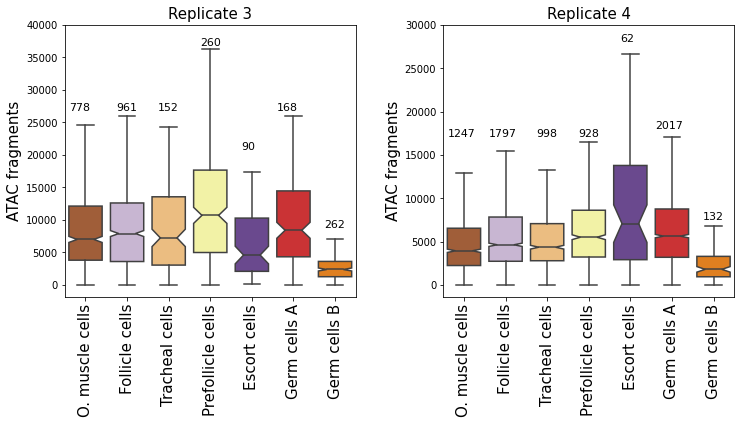

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 5), gridspec_kw={'wspace':0.3})
plt.subplot(1,2,1)
my_pal ={0:'#cab2d6',1:'#e31a1c',2:'#b15928',3:'#6a3d9a',4:'#fdbf6f',5:'#ffff99',6:'#ff7f00'}
sns.boxplot(x='seurat_clusters', y=4, data=merged_both_replicate_3_counts,showfliers=False,order=[2,0,4,5,3,1,6],palette=my_pal,notch=True)
plt.ylabel("ATAC fragments",fontsize=15)
plt.title("Replicate 3",fontsize=15)
plt.xlabel(" ",fontsize=15)
region = ['O. muscle cells','Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B']
axes[0].set_xticks(np.arange(0,7), region,rotation = 90,fontsize=15)
axes[0].text(-0.4, 28000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==2]),fontsize=11, va='top')
axes[0].text(-0.4+1.15, 28000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==0]),fontsize=11, va='top')
axes[0].text(-0.4+2.15, 28000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==4]),fontsize=11, va='top')
axes[0].text(-0.4+3.15, 38000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==5]),fontsize=11,va='top')
axes[0].text(-0.4+4.15,22000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==3]),fontsize=11,va='top')
axes[0].text(-0.4+5, 28000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==1]),fontsize=11, va='top')
axes[0].text(-0.4+6.15,10000, len(merged_both_replicate_3_counts[merged_both_replicate_3_counts['seurat_clusters']==6]),fontsize=11, va='top')
plt.ylim(ymax=40000)
plt.subplot(1,2,2)
sns.boxplot(x='seurat_clusters', y=4, data=merged_both_replicate_4_counts,showfliers=False,order=[2,0,4,5,3,1,6],palette=my_pal,notch=True)
plt.ylabel("ATAC fragments",fontsize=15)
plt.xlabel(" ",fontsize=15)
plt.title("Replicate 4",fontsize=15)
axes[1].set_xticks(np.arange(0,7), region,rotation = 90,fontsize=15)
axes[1].text(-0.4, 18000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==2]),fontsize=11, va='top')
axes[1].text(-0.4+1, 18000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==0]),fontsize=11, va='top')
axes[1].text(-0.4+2.15, 18000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==4]),fontsize=11, va='top')
axes[1].text(-0.4+3.15, 18000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==5]),fontsize=11,va='top')
axes[1].text(-0.4+4.15,29000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==3]),fontsize=11,va='top')
axes[1].text(-0.4+5, 19000, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==1]),fontsize=11, va='top')
axes[1].text(-0.4+6.15,8500, len(merged_both_replicate_4_counts[merged_both_replicate_4_counts['seurat_clusters']==6]),fontsize=11, va='top')
plt.ylim(ymax=30000)
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC_number_of_fragments.png',bbox_inches='tight',facecolor='white')

In [10]:
def windows(dt2,size):
    dt=dt2.copy()
    window=size
    for j in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]:
        for i in np.arange(0,math.floor(max(dt[dt[0]=='chr'+str(j)][2])/window),1):
            dt.loc[((dt[0]=='chr'+str(j))&(dt[2]>i*window)&(dt[2] < ((i*window)+window))), 'strata'] = 'chr'+str(j)+'bin' +str(i)
    dt_grouped=pd.DataFrame(dt.groupby(['seurat_clusters','strata'])[4].sum()).reset_index()
    dt_pivoted=dt_grouped.pivot(index='seurat_clusters', columns='strata', values=4).reset_index()
    return dt_pivoted,dt

In [11]:
merged_final_replicate_4_windows,merged_final_replicate_4_windows_raw=windows(merged_both_replicate_4,500000)
merged_final_replicate_3_windows,merged_final_replicate_3_windows_raw=windows(merged_both_replicate_3,500000)

In [12]:
merged_final_windows=merged_final_replicate_3_windows+merged_final_replicate_4_windows
merged_final_windows['seurat_clusters']=merged_final_replicate_3_windows['seurat_clusters']

In [16]:
merged_final_replicate_3_windows_raw.loc[((merged_final_replicate_3_windows_raw[0]=='chr6')&(merged_final_replicate_3_windows_raw[2]<=48665001)), 'strata_2'] = 'pseudo'
merged_final_replicate_3_windows_raw.loc[((merged_final_replicate_3_windows_raw[0]=='chr6')&(((merged_final_replicate_3_windows_raw[2] > 45665001.0) & (merged_final_replicate_3_windows_raw[2] <= 48665001)))),'strata_2'] = 'S1'
merged_final_replicate_3_windows_raw.loc[((merged_final_replicate_3_windows_raw[0]=='chr6')&(((merged_final_replicate_3_windows_raw[2] > 48665001) & (merged_final_replicate_3_windows_raw[2] <= 53325001))|((merged_final_replicate_3_windows_raw[2] > 53585001) & (merged_final_replicate_3_windows_raw[2] <= 54575001))|((merged_final_replicate_3_windows_raw[2] > 54735001) & (merged_final_replicate_3_windows_raw[2] <= 61725001)))),'strata_2'] = 'S0'
merged_final_replicate_3_windows_raw.loc[((merged_final_replicate_3_windows_raw[0]=='chr6')&(((merged_final_replicate_3_windows_raw[2] > 61725001.0) & (merged_final_replicate_3_windows_raw[2] <= 66725001)))), 'strata_2'] = 'S2'
merged_final_replicate_3_windows_raw.loc[((merged_final_replicate_3_windows_raw[0].str.contains('W'))), 'strata_2'] = 'W'

In [72]:
#zone_atac_seq=pd.concat([merged_final_replicate_3_windows_raw[['barcodes','seurat_clusters','zone']].drop_duplicates('barcodes')[['barcodes','zone']],merged_final_replicate_4_windows_raw[['barcodes','seurat_clusters','zone']].drop_duplicates('barcodes')[['barcodes','zone']]])

In [74]:
#zone_atac_seq['barcodes']=zone_atac_seq['barcodes']+'-1'

In [75]:
#zone_atac_seq.to_csv("/nfs/scistore18/vicosgrp/melkrewi/shirin/zones_all_clusters_atac.txt",sep="\t",index=False)

In [19]:
merged_final_autosomal=merged_final_windows[list(set(merged_final_windows.filter(regex='chr').columns.tolist())-set(merged_final_windows.filter(regex='chr6bin').columns.tolist()))].T
merged_final_S0=merged_final_windows[merged_final_replicate_3_windows_raw[merged_final_replicate_3_windows_raw['strata_2']=='S0']['strata'].drop_duplicates().tolist()].T
merged_final_Z=merged_final_windows[merged_final_replicate_3_windows_raw[merged_final_replicate_3_windows_raw['strata_2']=='pseudo']['strata'].drop_duplicates().dropna().tolist()].T

In [20]:
cluster_median=[]
def median_strata(dm_S0,dm_autosomal):
    for i in [2,0,4,5,3,1,6]:
        cluster_median.append(np.log2(np.median(dm_S0[i])/np.median(dm_autosomal[i])))
    return cluster_median

In [22]:
def windows_and_zones(dt2,size,cluster):
    dt=dt2[dt2['seurat_clusters']==cluster].copy()
    window=size
    for j in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]:
        for i in np.arange(0,math.floor(max(dt[dt[0]=='chr'+str(j)][2])/window),1):
            dt.loc[((dt[0]=='chr'+str(j))&(dt[2]>i*window)&(dt[2] < ((i*window)+window))), 'strata'] = 'chr'+str(j)+'bin' +str(i)
    dt_grouped=pd.DataFrame(dt.groupby(['zone','strata'])[4].sum()).reset_index()
    dt_pivoted=dt_grouped.pivot(index='zone', columns='strata', values=4).reset_index()
    return dt_pivoted

merged_zone_replicate_3_cluster_6=windows_and_zones(merged_both_replicate_3,500000,6)
merged_zone_replicate_4_cluster_6=windows_and_zones(merged_both_replicate_4,500000,6)
merged_zone_replicate_3_cluster_1=windows_and_zones(merged_both_replicate_3,500000,1)
merged_zone_replicate_4_cluster_1=windows_and_zones(merged_both_replicate_4,500000,1)

In [25]:
def S0_vs_autosomal(dw2):
    dw=dw2.copy()
    dw_autosomal=dw[list(set(dw.filter(regex='chr').columns.tolist())-set(dw.filter(regex='chr6bin').columns.tolist()))].T
    dw_S0=dw[merged_final_replicate_3_windows_raw[merged_final_replicate_3_windows_raw['strata_2']=='S0']['strata'].dropna().drop_duplicates().tolist()].T
    dw_pseudo=dw[merged_final_replicate_3_windows_raw[merged_final_replicate_3_windows_raw['strata_2']=='pseudo']['strata'].dropna().drop_duplicates().tolist()].T
    return dw_autosomal,dw_S0,dw_pseudo

In [26]:
mzr_36_autosomal,mzr_36_S0,mzr_36_pseudo=S0_vs_autosomal(merged_zone_replicate_3_cluster_6)
mzr_46_autosomal,mzr_46_S0,mzr_46_pseudo=S0_vs_autosomal(merged_zone_replicate_4_cluster_6)
mzr_6_autosomal=mzr_36_autosomal+mzr_46_autosomal
mzr_6_S0=mzr_36_S0+mzr_46_S0
mzr_6_pseudo=mzr_36_pseudo+mzr_46_pseudo
mzr_31_autosomal,mzr_31_S0,mzr_31_pseudo=S0_vs_autosomal(merged_zone_replicate_3_cluster_1)
mzr_41_autosomal,mzr_41_S0,mzr_41_pseudo=S0_vs_autosomal(merged_zone_replicate_4_cluster_1)
mzr_1_autosomal=mzr_31_autosomal+mzr_41_autosomal
mzr_1_S0=mzr_31_S0+mzr_41_S0
mzr_1_pseudo=mzr_31_pseudo+mzr_41_pseudo

In [28]:
from scipy.stats import ranksums
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [29]:
merged_final_Z['somatic']=np.median([merged_final_Z[2].astype(float),merged_final_Z[0].astype(float),merged_final_Z[4].astype(float)])
merged_final_S0['somatic']=np.median([merged_final_S0[2].astype(float),merged_final_S0[0].astype(float),merged_final_S0[4].astype(float)])
merged_final_autosomal['somatic']=np.median([merged_final_autosomal[2].astype(float),merged_final_autosomal[0].astype(float),merged_final_autosomal[4].astype(float)])

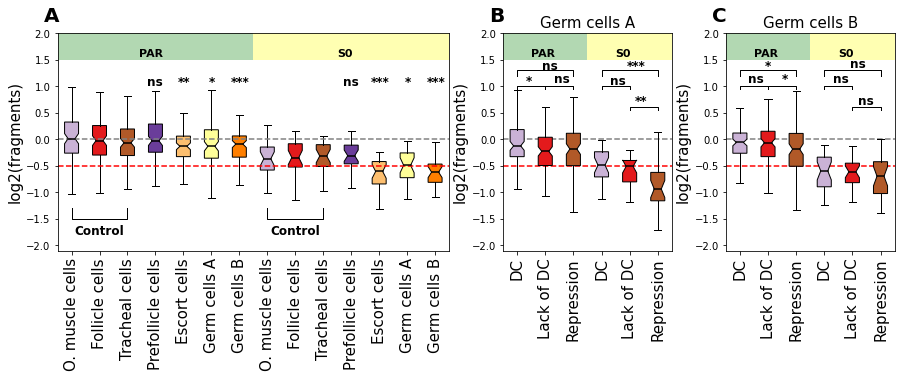

In [33]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(20, 5))

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 4)

pl.figure(figsize=(15, 4))

# set the spacing between subplots
plt.subplots_adjust(wspace=0.32, 
                    hspace=1.1)
ax = pl.subplot(gs[0, 2]) # row 0, col 0
plt.title('Germ cells A',fontsize=15)
plt.hlines(0,0.5,6.5,color="gray",linestyle='dashed')
plt.hlines(-0.5,0.5,6.5,color="red",linestyle='dashed')
plt.text(0, 2.5, 'B',fontsize=20, fontweight='bold', va='top')
plot1=plt.boxplot([np.log2(mzr_1_pseudo[0])-np.median(np.log2(mzr_1_autosomal[0].dropna())),np.log2(mzr_1_pseudo[2])-np.median(np.log2(mzr_1_autosomal[2].dropna())),np.log2(mzr_1_pseudo[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna())),np.log2(mzr_1_S0[0])-np.median(np.log2(mzr_1_autosomal[0].dropna())),np.log2(mzr_1_S0[2])-np.median(np.log2(mzr_1_autosomal[2].dropna())),np.log2(mzr_1_S0[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna()))],showfliers=False,notch=True,medianprops = dict(color = "black", linewidth = 1.5),patch_artist=True)
region = ['DC','Lack of DC','Repression','DC','Lack of DC','Repression']
colors=['#cab2d6','#e31a1c','#b15928','#cab2d6','#e31a1c','#b15928']
for patch, color in zip(plot1['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(np.arange(1,7), region,rotation = 90,fontsize=15)
plt.ylabel('log2(fragments)',fontsize=15)
plt.text(1.5, 1.72, 'PAR',fontsize=11, fontweight='bold', va='top')
#plt.text(-1.4, 3.7, 'A',fontsize=20, fontweight='bold', va='top')
plt.text(4.5, 1.72, 'S0',fontsize=11, fontweight='bold', va='top')
#plt.text(8, 1.72, 'S0',fontsize=11,fontweight='bold', va='top')
plt.ylim(ymax=2,ymin=-2.1)
plt.fill_between([3.5,6.5], 1.5, 2,facecolor='yellow', alpha=0.3,zorder=0)
plt.fill_between([0.5,3.5], 1.5, 2,facecolor='green', alpha=0.3,zorder=0)
#plt.fill_between([6.5,9.5],1.5, 2,facecolor='yellow', alpha=0.3,zorder=0)
plt.plot([1,1, 3,3], [1.2, 1.3, 1.3,1.2], linewidth=1, color='k')
plt.plot([1,1, 2,2], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([2,2, 3,3], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([4,4, 6,6], [1.2, 1.3, 1.3,1.2], linewidth=1, color='k')
plt.plot([4,4, 5,5], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([5,5, 6,6], [0.55, 0.6, 0.6,0.55], linewidth=1, color='k')
plt.text(1.3, 1.22, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_pseudo[2].dropna())-np.median(np.log2(mzr_1_autosomal[2].dropna())),np.log2(mzr_1_pseudo[0].dropna())-np.median(np.log2(mzr_1_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(1.9, 1.5, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_pseudo[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna())),np.log2(mzr_1_pseudo[0].dropna())-np.median(np.log2(mzr_1_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(2.3, 1.25, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_pseudo[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna())),np.log2(mzr_1_pseudo[2].dropna())-np.median(np.log2(mzr_1_autosomal[2].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(4.3, 1.22, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_S0[2].dropna())-np.median(np.log2(mzr_1_autosomal[2].dropna())),np.log2(mzr_1_S0[0].dropna())-np.median(np.log2(mzr_1_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(4.9, 1.5, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_S0[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna())),np.log2(mzr_1_S0[0].dropna())-np.median(np.log2(mzr_1_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(5.2, 0.85, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_1_S0[1].dropna())-np.median(np.log2(mzr_1_autosomal[1].dropna())),np.log2(mzr_1_S0[2].dropna())-np.median(np.log2(mzr_1_autosomal[2].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
ax = pl.subplot(gs[0, 3]) # row 0, col 1
plt.title('Germ cells B',fontsize=15)
plt.hlines(0,0.5,6.5,color="gray",linestyle='dashed')
plt.hlines(-0.5,0.5,6.5,color="red",linestyle='dashed')
plot2=plt.boxplot([np.log2(mzr_6_pseudo[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),np.log2(mzr_6_pseudo[2].dropna())-np.median(np.log2(mzr_6_autosomal[2].dropna())),np.log2(mzr_6_pseudo[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna())),np.log2(mzr_6_S0[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),np.log2(mzr_6_S0[2])-np.median(np.log2(mzr_6_autosomal[2].dropna())),np.log2(mzr_6_S0[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna()))],showfliers=False,notch=True,medianprops = dict(color = "black", linewidth = 1.5),patch_artist=True)
plt.text(0, 2.5, 'C',fontsize=20, fontweight='bold', va='top')
colors=['#cab2d6','#e31a1c','#b15928','#cab2d6','#e31a1c','#b15928']
for patch, color in zip(plot2['boxes'], colors):
    patch.set_facecolor(color)
region = ['DC','Lack of DC','Repression','DC','Lack of DC','Repression']
plt.xticks(np.arange(1,7), region,rotation = 90,fontsize=15)
plt.ylabel('log2(fragments)',fontsize=15)
plt.text(1.5, 1.72, 'PAR',fontsize=11, fontweight='bold', va='top')
#plt.text(-1.4, 3.7, 'A',fontsize=20, fontweight='bold', va='top')
plt.text(4.5, 1.72, 'S0',fontsize=11, fontweight='bold', va='top')
#plt.text(8, 1.72, 'S0',fontsize=11,fontweight='bold', va='top')
plt.ylim(ymax=2,ymin=-2.1)
plt.fill_between([3.5,6.5], 1.5, 2,facecolor='yellow', alpha=0.3,zorder=0)
plt.fill_between([0.5,3.5], 1.5, 2,facecolor='green', alpha=0.3,zorder=0)
#plt.fill_between([6.5,9.5],1.5, 2,facecolor='yellow', alpha=0.3,zorder=0)
#plt.text(3.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[5])-np.median(np.log2(merged_final_autosomal[5])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
#plt.text(4.8, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[3])-np.median(np.log2(merged_final_autosomal[3])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
#plt.text(5.9, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[1])-np.median(np.log2(merged_final_autosomal[1])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.plot([1,1, 3,3], [1.2, 1.3, 1.3,1.2], linewidth=1, color='k')
plt.plot([1,1, 2,2], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([2,2, 3,3], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([4,4, 6,6], [1.2, 1.3, 1.3,1.2], linewidth=1, color='k')
plt.plot([4,4, 5,5], [0.95, 1, 1,0.95], linewidth=1, color='k')
plt.plot([5,5, 6,6], [0.55, 0.6, 0.6,0.55], linewidth=1, color='k')
plt.text(1.3, 1.25, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_pseudo[2].dropna())-np.median(np.log2(mzr_6_autosomal[2].dropna())),np.log2(mzr_6_pseudo[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(1.9, 1.5, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_pseudo[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna())),np.log2(mzr_6_pseudo[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(2.5, 1.25, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_pseudo[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna())),np.log2(mzr_6_pseudo[2].dropna())-np.median(np.log2(mzr_6_autosomal[2].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(4.3, 1.25, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_S0[2].dropna())-np.median(np.log2(mzr_6_autosomal[2].dropna())),np.log2(mzr_6_S0[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(4.9, 1.55, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_S0[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna())),np.log2(mzr_6_S0[0])-np.median(np.log2(mzr_6_autosomal[0].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(5.2, 0.85, convert_pvalue_to_asterisks(ranksums(np.log2(mzr_6_S0[1].dropna())-np.median(np.log2(mzr_6_autosomal[1].dropna())),np.log2(mzr_6_S0[2].dropna())-np.median(np.log2(mzr_6_autosomal[2].dropna())),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
ax = pl.subplot(gs[0, :2]) # row 1, span all columns
plot=plt.boxplot([np.log2(merged_final_Z[2])-np.median(np.log2(merged_final_autosomal[2])),np.log2(merged_final_Z[0])-np.median(np.log2(merged_final_autosomal[0])),np.log2(merged_final_Z[4])-np.median(np.log2(merged_final_autosomal[4])),np.log2(merged_final_Z[5])-np.median(np.log2(merged_final_autosomal[5])),np.log2(merged_final_Z[3])-np.median(np.log2(merged_final_autosomal[3])),np.log2(merged_final_Z[1])-np.median(np.log2(merged_final_autosomal[1])),np.log2(merged_final_Z[6])-np.median(np.log2(merged_final_autosomal[6])),np.log2(merged_final_S0[2])-np.median(np.log2(merged_final_autosomal[2])),np.log2(merged_final_S0[0])-np.median(np.log2(merged_final_autosomal[0])),np.log2(merged_final_S0[4])-np.median(np.log2(merged_final_autosomal[4])),np.log2(merged_final_S0[5])-np.median(np.log2(merged_final_autosomal[5])),np.log2(merged_final_S0[3])-np.median(np.log2(merged_final_autosomal[3])),np.log2(merged_final_S0[1])-np.median(np.log2(merged_final_autosomal[1])),np.log2(merged_final_S0[6])-np.median(np.log2(merged_final_autosomal[6]))],showfliers=False,patch_artist=True,notch=True,medianprops = dict(color = "black", linewidth = 1.5))
colors=['#cab2d6','#e31a1c','#b15928','#6a3d9a','#fdbf6f','#ffff99','#ff7f00','#cab2d6','#e31a1c','#b15928','#6a3d9a','#fdbf6f','#ffff99','#ff7f00']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('log2(fragments)',fontsize=15)
plt.hlines(0,0.5,14.5,color="gray",linestyle='dashed')
plt.hlines(-0.5,0.5,14.5,color="red",linestyle='dashed')
#region = ['Auto','Pseudo\nOvarian muscle cells','S0','Auto','Pseudo\nFollicle cells','S0','Auto','Pseudo\nTracheal cells','S0','Auto','Pseudo\nPrefollicle cells','S0','Auto','Pseudo\nEscort cells','S0','Auto','Pseudo\nGerm cells A','S0','Auto','Pseudo\nGerm cells B','S0']
region = ['O. muscle cells','Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B','O. muscle cells','Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B']
plt.text(3.4, 1.72, 'PAR',fontsize=11, fontweight='bold', va='top')
#plt.text(-1.4, 3.7, 'A',fontsize=20, fontweight='bold', va='top')
plt.text(10.5, 1.72, 'S0',fontsize=11, fontweight='bold', va='top')
#plt.text(17.5, 1.4, 'S0',fontsize=11,fontweight='bold', va='top')
plt.ylim(ymax=2,ymin=-2.1)
plt.text(0, 2.5, 'A',fontsize=20, fontweight='bold', va='top')
plt.fill_between([7.5,14.5], 1.5, 2,facecolor='yellow', alpha=0.3,zorder=0)
plt.fill_between([0.5,7.5], 1.5, 2,facecolor='green', alpha=0.3,zorder=0)
#plt.fill_between([14.5,21.5],1.2, 1.7,facecolor='yellow', alpha=0.3,zorder=0)
plt.xticks(np.arange(1,15), region,rotation = 90,fontsize=15)
plt.plot([1,1, 3,3], [-1.3, -1.5, -1.5,-1.3], linewidth=1, color='k')
plt.plot([8,8, 10,10], [-1.3, -1.5, -1.5,-1.3], linewidth=1, color='k')
plt.text(1.1, -1.6, "Control",fontsize=12, fontweight='bold', va='top')
plt.text(8.1, -1.6, "Control",fontsize=12, fontweight='bold', va='top')
plt.text(3.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[5])-np.median(np.log2(merged_final_autosomal[5])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(4.8, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[3])-np.median(np.log2(merged_final_autosomal[3])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(5.9, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[1])-np.median(np.log2(merged_final_autosomal[1])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(6.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_Z[6])-np.median(np.log2(merged_final_autosomal[6])),np.log2(merged_final_Z['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(10.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_S0[5])-np.median(np.log2(merged_final_autosomal[5])),np.log2(merged_final_S0['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(11.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_S0[3])-np.median(np.log2(merged_final_autosomal[3])),np.log2(merged_final_S0['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(12.9, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_S0[1])-np.median(np.log2(merged_final_autosomal[1])),np.log2(merged_final_S0['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.text(13.7, 1.2, convert_pvalue_to_asterisks(ranksums(np.log2(merged_final_S0[6])-np.median(np.log2(merged_final_autosomal[6])),np.log2(merged_final_S0['somatic'])-np.median(np.log2(merged_final_autosomal['somatic'])),alternative='less')[1]),fontsize=12, fontweight='bold', va='top')
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC_results_all_v7_repression.png',bbox_inches='tight',facecolor='white')